In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
import os
import shapely
from shapely.geometry import LineString, Point
from shapely.ops import cascaded_union
import numpy as np
import time
from sklearn.preprocessing import normalize
from numpy import linalg
from util import *
import hickle as hkl 
import pdb
import rtree

In [23]:
def group_and_map(filename):
    t = pd.read_csv(filename)
    t['count'] = 1
    count = t.groupby(['pu','do'])['count'].count()
    count = pd.DataFrame(count)
    count.columns = ['Count']
    count.reset_index(inplace = True)
    del t
    keep = count.groupby(['pu'])['Count'].sum()
    keep = list(keep[keep/keep.sum() > 1e-4].index)
    count = count[count.pu.apply(lambda x: x in keep) * count.do.apply(lambda x: x in keep)]
    count.reset_index(inplace = True, drop = True)
    unique = count.pu.unique()
    statemap = dict(zip(unique, range(len(unique))))
    return count, statemap

def build_matrix(count, statemap):
    A = np.zeros((len(statemap),len(statemap)))
    for i in range(count.shape[0]):
        try:
            A[int(statemap[count.pu[i]]), int(statemap[count.do[i]])] = count.Count[i]
        except Exception as e:
            raise ValueError(e)
    A = normalize(A, norm = 'l1',axis = 1)
    assert all(np.isclose(linalg.norm(A, ord = 1,axis = 1), np.ones(A.shape[0])))
    return A

def inspect(A):
    plt.hist(A.sum(axis = 0), bins = 15,range = (0,15))
    plt.show()
    plt.hist(A.sum(axis = 1), bins = 15,range = (0,15))
    plt.show()

def get_center(grid):
    grid.geometry = grid.geometry.apply(lambda x: x.centroid)
    return grid

In [24]:
import os
os.listdir()

['NMF.py',
 '100.zip',
 'PostProcessing.ipynb',
 '.gitignore',
 'NMF_test.py',
 'nmf_new.py',
 '__pycache__',
 '150.zip',
 'util.py',
 'preprocessing.py',
 'NMF.ipynb',
 '100',
 'Result.ipynb',
 '.ipynb_checkpoints',
 '125.zip',
 'nmf_adaptive.py',
 'postprocessing.py',
 '.gitattributes',
 'taxi_zones',
 '125',
 'Validation.ipynb',
 '.git',
 'Map Investigation.ipynb']

In [9]:
man = get_zones()

In [25]:
grid = get_joint_grid(man, 100, True)

/home/keane/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != +proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +type=crs)
  "(%s != %s)" % (left_df.crs, right_df.crs)
/home/keane/anaconda3/lib/python3.7/site-packages/geopandas/base.py:104: UserWarning: Cannot generate spatial index: Missing package `rtree`.
  warn("Cannot generate spatial index: Missing package `rtree`.")


AttributeError: 'NoneType' object has no attribute 'intersection'

In [8]:
grid = get_center(grid)

/home/keane/anaconda3/lib/python3.7/site-packages/geopandas/base.py:104: UserWarning: Cannot generate spatial index: Missing package `rtree`.
  warn("Cannot generate spatial index: Missing package `rtree`.")


AttributeError: 'NoneType' object has no attribute 'intersection'

In [13]:
count,statemap = group_and_map('./100/100_Grid_AggregatedTrip.csv')

/home/keane/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


/home/keane/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:351: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  expl_series = geopandas.GeoSeries(geoms)


AttributeError: 'Series' object has no attribute 'type'

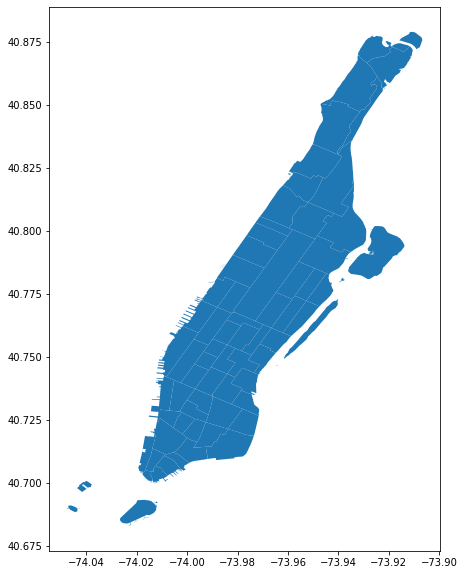

In [68]:
zone = gpd.read_file('./taxi_zones/taxi_zones.shp')
zone = zone.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
man= zone[zone.borough == 'Manhattan']
fig, ax = plt.subplots(figsize = (10,10))
man.plot(ax=ax)
grid.loc[list(set(count[count.Count > 200].pu)),].plot(**{'edgecolor': 'yellow', 'alpha':0.9}, ax = ax)

In [32]:
count

,pu,do,Count
0,59.0,59.0,33
1,59.0,60.0,13
2,59.0,61.0,7
3,59.0,74.0,5
4,59.0,75.0,4
...,...,...,...
890129,2228.0,2102.0,11
890130,2228.0,2103.0,9
890131,2228.0,2107.0,2
890132,2228.0,2143.0,19


In [33]:
statemap

{59.0: 0,
 60.0: 1,
 61.0: 2,
 74.0: 3,
 75.0: 4,
 76.0: 5,
 77.0: 6,
 78.0: 7,
 79.0: 8,
 89.0: 9,
 90.0: 10,
 92.0: 11,
 93.0: 12,
 94.0: 13,
 95.0: 14,
 96.0: 15,
 107.0: 16,
 108.0: 17,
 109.0: 18,
 110.0: 19,
 111.0: 20,
 113.0: 21,
 114.0: 22,
 115.0: 23,
 127.0: 24,
 128.0: 25,
 130.0: 26,
 131.0: 27,
 132.0: 28,
 133.0: 29,
 134.0: 30,
 153.0: 31,
 154.0: 32,
 156.0: 33,
 157.0: 34,
 158.0: 35,
 159.0: 36,
 160.0: 37,
 161.0: 38,
 162.0: 39,
 181.0: 40,
 182.0: 41,
 183.0: 42,
 184.0: 43,
 185.0: 44,
 186.0: 45,
 187.0: 46,
 188.0: 47,
 189.0: 48,
 190.0: 49,
 191.0: 50,
 192.0: 51,
 193.0: 52,
 195.0: 53,
 196.0: 54,
 197.0: 55,
 198.0: 56,
 199.0: 57,
 200.0: 58,
 203.0: 59,
 208.0: 60,
 209.0: 61,
 210.0: 62,
 211.0: 63,
 212.0: 64,
 213.0: 65,
 214.0: 66,
 215.0: 67,
 216.0: 68,
 218.0: 69,
 219.0: 70,
 220.0: 71,
 221.0: 72,
 222.0: 73,
 223.0: 74,
 224.0: 75,
 225.0: 76,
 226.0: 77,
 227.0: 78,
 228.0: 79,
 229.0: 80,
 230.0: 81,
 231.0: 82,
 239.0: 83,
 240.0: 84,
 241.0

In [26]:
A = build_matrix(count,statemap)

In [31]:
A.sum(axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
zone = gpd.read_file('./taxi_zones/taxi_zones.shp')
zone = zone.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
man= zone[zone.borough == 'Manhattan']
fig, ax = plt.subplots(figsize = (10,10))
man.plot(ax=ax)
grid.loc[list(set(count[count.Count > 200].pu)),].plot(**{'edgecolor': 'yellow', 'alpha':0.9}, ax = ax)

In [77]:
grid

,Unnamed: 0,geometry
0,0,POLYGON ((-74.04772962698515 40.68919282069494...
2,2,POLYGON ((-74.04660111244927 40.68762385188251...
3,3,POLYGON ((-74.04660111244927 40.68919282069494...
4,4,POLYGON ((-74.04660111244927 40.69076178950738...
5,5,POLYGON ((-74.04547259791339 40.68762385188251...
...,...,...
3957,3957,POLYGON ((-73.90892233907211 40.87119320293745...
3958,3958,POLYGON ((-73.90892233907211 40.87276217174988...
3959,3959,POLYGON ((-73.90892233907211 40.87433114056232...
3960,3960,POLYGON ((-73.90892233907211 40.87590010937475...


In [113]:
# print(A.shape)
# print(len(count))
# hkl.dump(A, '100_matrix.hkl' )

### Decomposition

In [114]:
import numpy as np
from sklearn.decomposition import nmf
#import nmf_new
from sklearn.preprocessing import normalize
from numpy import linalg, random
from numpy.linalg import norm
from util import *
from nmf_adaptive import *

In [115]:
LAMBDA = 1e-10
EPS = 1e-14
GAMMA1 = 1.1
GAMMA2 = 1.2
LR = 100
d = A.shape[0]
r = 2
s0 = 1
U,V,mu,E = non_negative_factorization(A,s0,lr = LR, max_iter = 7, lambda_ = LAMBDA, eps = EPS, gamma1 = GAMMA1, gamma2 = GAMMA2)

In [116]:
U.shape

(1093, 6)

In [117]:
#hkl.dump(U, '100_matrix_U.hkl' )

### Clustering

In [146]:
U,V = hkl.load('125/2/Output_r=9')
statemap = hkl.load('125/125_Statemap.hkl')

In [147]:
a,b = zip(*list(statemap.items()))
statemap = dict(zip([float(x) for x in a],b))

In [153]:
grid = pd.read_csv('125/125_Grid.csv',usecols=[1])

In [154]:
from shapely import wkt

grid['geometry'] = grid['geometry'].apply(wkt.loads)
grid = gpd.GeoDataFrame(grid, geometry='geometry')
grid = get_center(grid)

In [107]:
count,statemap = group_and_map('./125/125_Grid_AggregatedTrip.csv')

/home/keane/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


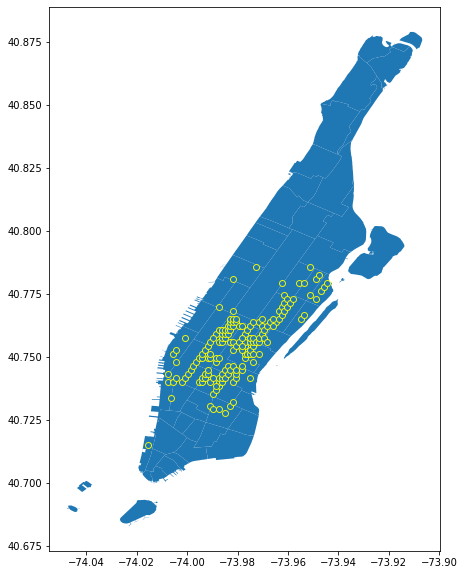

In [155]:
zone = gpd.read_file('./taxi_zones/taxi_zones.shp')
zone = zone.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
man= zone[zone.borough == 'Manhattan']
fig, ax = plt.subplots(figsize = (10,10))
man.plot(ax=ax)
grid.loc[list(set(count[count.Count > 200].pu)),].plot(**{'edgecolor': 'yellow', 'alpha':0.9}, ax = ax)

In [148]:
from sklearn.cluster import KMeans
pred = KMeans(n_clusters=10).fit_predict(U)

In [149]:
inv_statemap = {v:k for k,v in statemap.items()}

In [150]:
mapped_result = []
for group in range(10):
    mapped_result.append([inv_statemap[mem] for mem in list(np.where(pred == group)[0])])

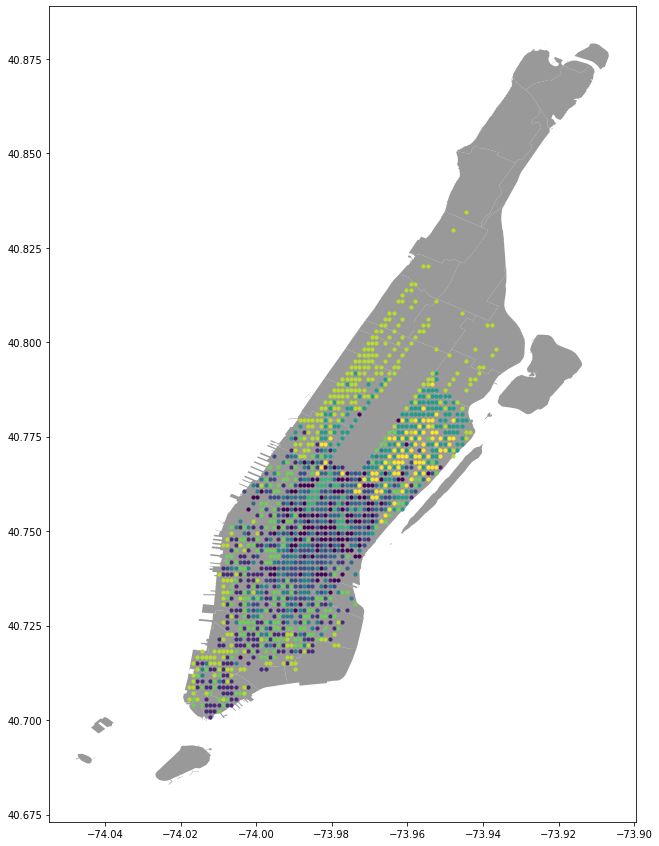

In [156]:
zone = gpd.read_file('taxi_zones/taxi_zones.shp')
zone = zone.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")
man= zone[zone.borough == 'Manhattan']
fig, ax = plt.subplots(figsize = (15,15))
man.plot(ax=ax, color = 'grey', alpha = 0.8)
ColorsA=plt.cm.viridis(np.linspace(0, 1,len(mapped_result)),alpha=10)
for i,group in enumerate(mapped_result):
    grid.iloc[group,].plot(**{'color': ColorsA[i], 'markersize':10}, ax = ax)
#plt.savefig('test.png')